<a href="https://colab.research.google.com/github/Kalashri21/Codsoft-Internship/blob/main/codsoft_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import re


In [ ]:
train_path="/content/train_data.txt"
movies=pd.read_csv(train_path,sep=':::', header=None, names=['title','genre','description'])
test_path="/content/test_data_solution.txt"
movies_test=pd.read_csv(test_path,sep=':::', header=None, names=['title','genre','description'])

<ipython-input-5-9193ff36e692>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies=pd.read_csv(train_path,sep=':::', header=None, names=['title','genre','description'])
<ipython-input-5-9193ff36e692>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_test=pd.read_csv(test_path,sep=':::', header=None, names=['title','genre','description'])


In [ ]:
movies.head()

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
movies_test.head()

,title,genre,description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1603 entries, 1 to 1603
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1603 non-null   object
 1   genre        1603 non-null   object
 2   description  1603 non-null   object
dtypes: object(3)
memory usage: 50.1+ KB


In [ ]:
print("There are movies {} genres in the database".format(movies.loc[:,"genre"].nunique()))

There are movies 27 genres in the database


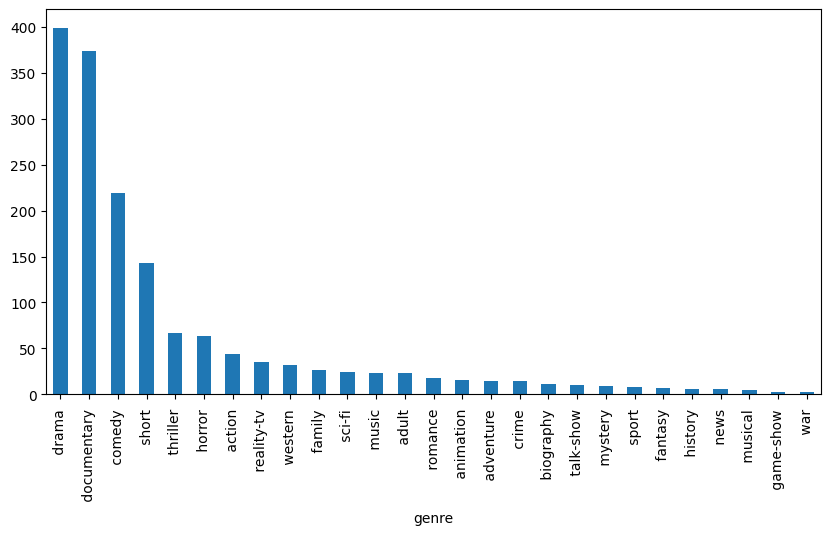

In [ ]:
plt.figure(figsize=(10,5))
movies.loc[:, "genre"].value_counts().plot(kind='bar')
plt.show()

There are no missing values in the dataset so we won't worry about that. However the data is unbalanced: there are significantly more "drama", "documentary", "comedy" and "short" movies in comparison to the remaining genres.

In [ ]:
train_data = pd.read_csv(train_path,sep=":::",names=['movie','genre','description'],engine='python')
test_data = pd.read_csv(test_path,sep=":::",names=['movie','genre','description'],engine='python')

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
import string
nltk.download('stopwords')
nltk.download('punkt')

stopwords=set(stopwords.words('english'))
stemmer=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
train_data.duplicated().sum()
test_data.duplicated().sum()

0

In [ ]:
from wordcloud import WordCloud
def word_cloud(data):
    all_desc=' '.join(data['description'])
    wordcloud=WordCloud(height=400,width=800,background_color='white').generate(all_desc)
    plt.figure(figsize=(10,5))

    plt.axis('off')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.show()

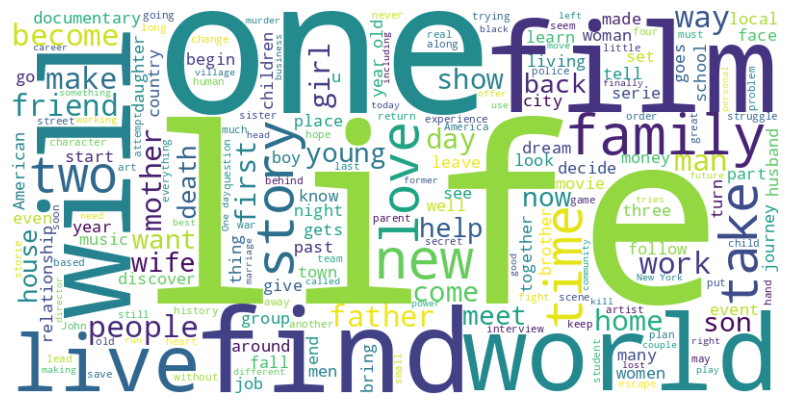

In [ ]:
word_cloud(train_data)

In [ ]:
x=train_data['description']
y=train_data['genre']
x_test=test_data['description']
y_test=test_data['genre']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_train

2764     Mallika is married to an NRI Rahul by her fam...
2548     A father brings a young child to an emergency...
625      The director of an engineering company in a s...
1778     First Position follows six talented young dan...
2689     A comedy that follows the sexual misadventure...
                              ...                        
4427     The story is about a family whose home had be...
467      Lauren has obtained her childhood dream of a ...
3093     Six years after stopping a multi-national arm...
3773     The Defintive Documentary of the Orange Count...
861      They are enemies in their professional lives....
Name: description, Length: 3809, dtype: object

In [ ]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(x_test)
X_valid=vectorizer.transform(X_valid)

In [ ]:
X_train

<3809x29591 sparse matrix of type '<class 'numpy.float64'>'
	with 264220 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
import xgboost as xgb
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
import warnings
import joblib
warnings.filterwarnings('ignore')
from time import time

In [ ]:
svm_model=SVC()

In [ ]:
#SVM model training
print('Model:SVM')
print('_'*30)
start=time()
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_valid)
end=time()
#SVM Validation dataset test
print(classification_report(y_valid,y_pred))
print(f'\nAccuracy score: {accuracy_score(y_valid,y_pred)} \nRunning Time: {round((end-start)/60.0,2)} Min')
print('*'*30)

Model:SVM
______________________________
               precision    recall  f1-score   support

      action        0.00      0.00      0.00        26
       adult        0.00      0.00      0.00        12
   adventure        0.00      0.00      0.00         8
   animation        0.00      0.00      0.00         5
   biography        0.00      0.00      0.00         7
      comedy        0.63      0.17      0.27       139
       crime        0.00      0.00      0.00         4
 documentary        0.50      0.89      0.64       233
       drama        0.39      0.85      0.53       229
      family        0.00      0.00      0.00        14
     fantasy        0.00      0.00      0.00         4
   game-show        0.00      0.00      0.00         7
     history        0.00      0.00      0.00         3
      horror        0.00      0.00      0.00        40
       music        0.00      0.00      0.00         7
     musical        0.00      0.00      0.00         2
     mystery        0.0

In [ ]:
LogisticRegression=LogisticRegression(max_iter=1000)

In [ ]:
#Logistic Regression model training
print('Model: Logistic Regression')
print('_'*30)
start=time()
LogisticRegression.fit(X_train,y_train)
y_pred=LogisticRegression.predict(X_valid)
end=time()
#Logistic Regression Validation dataset test
print(classification_report(y_valid,y_pred))
print(f'\nAccuracy score: {accuracy_score(y_valid,y_pred)} \nRunning Time: {round((end-start)/60.0,2)} Min')
print('*'*30)

Model: Logistic Regression
______________________________
               precision    recall  f1-score   support

      action        0.00      0.00      0.00        26
       adult        0.00      0.00      0.00        12
   adventure        0.00      0.00      0.00         8
   animation        0.00      0.00      0.00         5
   biography        0.00      0.00      0.00         7
      comedy        0.57      0.32      0.41       139
       crime        0.00      0.00      0.00         4
 documentary        0.50      0.89      0.64       233
       drama        0.41      0.82      0.55       229
      family        0.00      0.00      0.00        14
     fantasy        0.00      0.00      0.00         4
   game-show        0.00      0.00      0.00         7
     history        0.00      0.00      0.00         3
      horror        1.00      0.03      0.05        40
       music        0.00      0.00      0.00         7
     musical        0.00      0.00      0.00         2
     m

In [ ]:
test_models = {
    'Logistic Regression': LogisticRegression,
    'SVM':svm_model
}

In [ ]:
def test_model(xtest,ytest):
    for name,model in test_models.items():
        print('Model:'+name)
        print('_'*30)
        start=time()
        y_pred=model.predict(xtest)
        end=time()
        print(classification_report(ytest,y_pred))
        print(f'\nAccuracy score: {accuracy_score(ytest,y_pred)} \nRunning Time: {round((end-start)/60.0,2)}')
        print('*'*30)

In [ ]:
#test dataset test
test_model(X_test,y_test)

Model:Logistic Regression
______________________________
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       121
       adult        0.00      0.00      0.00        51
   adventure        0.00      0.00      0.00        72
   animation        0.00      0.00      0.00        63
   biography        0.00      0.00      0.00        23
      comedy        0.45      0.32      0.37       642
       crime        0.00      0.00      0.00        33
 documentary        0.51      0.90      0.66      1142
       drama        0.43      0.80      0.56      1257
      family        0.00      0.00      0.00        67
     fantasy        0.00      0.00      0.00        19
   game-show        0.00      0.00      0.00        13
     history        0.00      0.00      0.00        26
      horror        0.80      0.02      0.04       198
       music        0.00      0.00      0.00        65
     musical        0.00      0.00      0.00        15
     my